# Audio Visualization Techniques

This notebook demonstrates various techniques for visualizing audio data using the CTC-SpeechRefinement package. We'll explore different ways to represent audio signals visually, which can help in understanding their characteristics and patterns.

## Setup

First, let's import the necessary libraries and set up the environment.

In [1]:
# Add the project root to the Python path
import sys
import os
sys.path.append(os.path.abspath('..'))

# Import libraries
import numpy as np
import matplotlib.pyplot as plt
import librosa
import librosa.display
import pandas as pd
import seaborn as sns
from IPython.display import Audio, display, HTML
import glob
from pathlib import Path
from matplotlib.colors import LinearSegmentedColormap
import plotly.graph_objects as go
import plotly.express as px
from mpl_toolkits.mplot3d import Axes3D

# Import from the project
from ctc_speech_refinement.core.preprocessing.audio import load_audio
from ctc_speech_refinement.core.eda.descriptive_stats import analyze_descriptive_stats
from ctc_speech_refinement.core.eda.time_domain import analyze_time_domain
from ctc_speech_refinement.core.eda.frequency_domain import analyze_frequency_domain
from ctc_speech_refinement.core.eda.pitch_timbre import analyze_pitch_timbre

# Set up plotting
plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['figure.dpi'] = 100

/home/ngocducpc/miniconda3/envs/speech/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Load Audio Data

Let's load an audio file and examine its basic properties.

In [2]:
# Define the path to an audio file
audio_file = "../data/speech2text/input/test1_01.wav"  # Path to the audio file

# Load the audio file using our package's function
audio_data, sample_rate = load_audio(audio_file)

# Print basic information
print(f"Audio file: {audio_file}")
print(f"Sample rate: {sample_rate} Hz")
print(f"Duration: {len(audio_data) / sample_rate:.2f} seconds")
print(f"Number of samples: {len(audio_data)}")

# Play the audio
display(Audio(audio_data, rate=sample_rate))

2025-05-07 12:04:50,238 - ctc_speech_refinement.core.preprocessing.audio - INFO - Loading audio file: ../data/speech2text/input/test1_01.wav
2025-05-07 12:04:50,858 - ctc_speech_refinement.core.preprocessing.audio - INFO - Loaded audio with shape (213200,) and sample rate 16000


Audio file: ../data/speech2text/input/test1_01.wav
Sample rate: 16000 Hz
Duration: 13.32 seconds
Number of samples: 213200


## 1. Basic Waveform Visualization

Let's start with the basic waveform visualization.

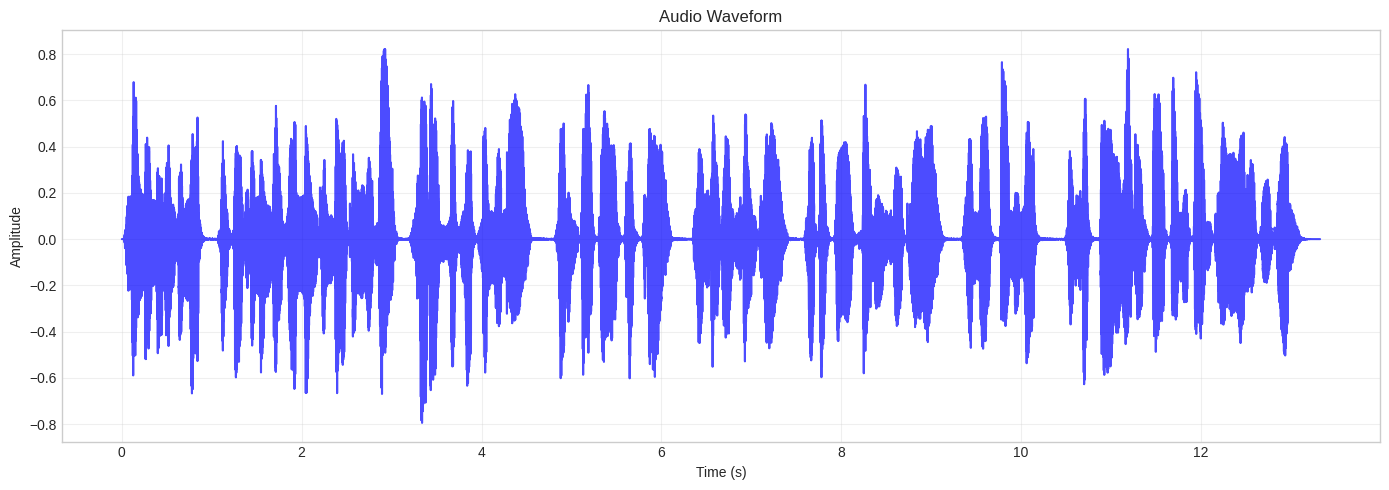

In [3]:
# Create time array
time = np.linspace(0, len(audio_data) / sample_rate, len(audio_data))

# Plot waveform
plt.figure(figsize=(14, 5))
plt.plot(time, audio_data, color='blue', alpha=0.7)
plt.title('Audio Waveform')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

## 2. Enhanced Waveform Visualization

Let's enhance the waveform visualization with additional features.

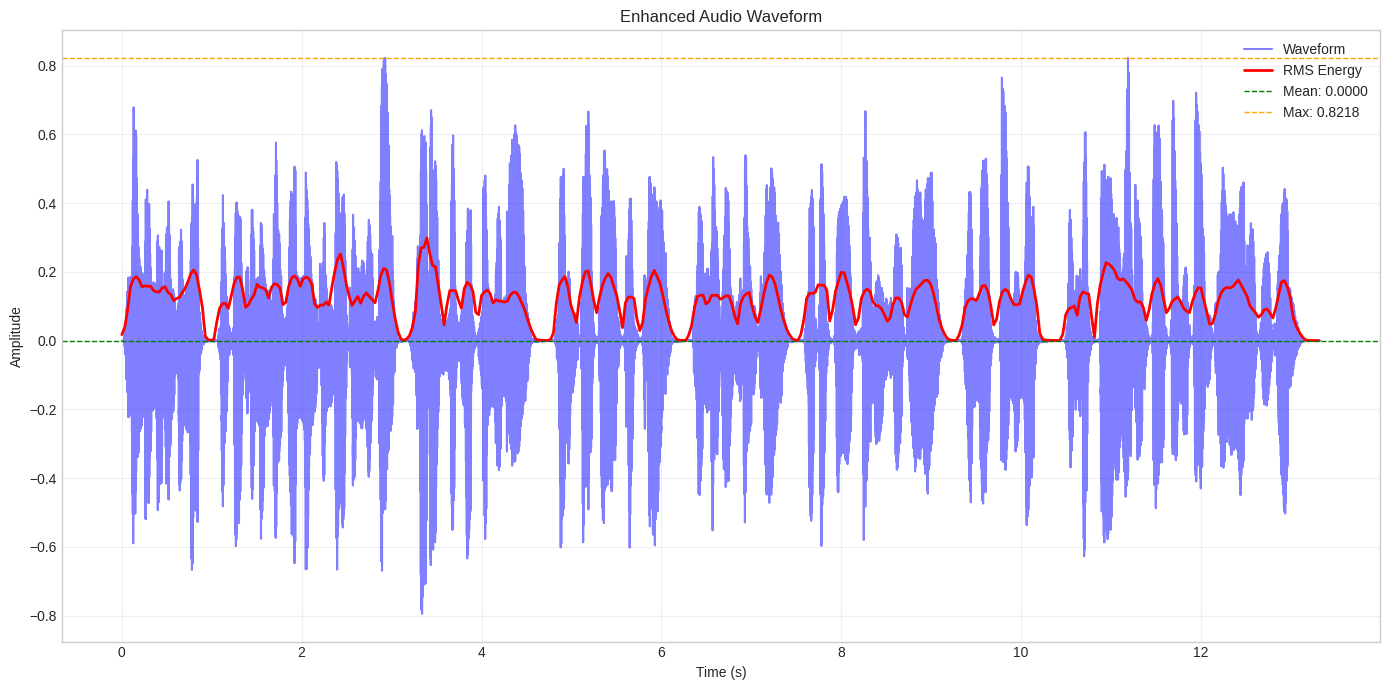

In [4]:
# Compute RMS energy
frame_length = 2048
hop_length = 512
rms = librosa.feature.rms(y=audio_data, frame_length=frame_length, hop_length=hop_length)[0]
rms_times = librosa.times_like(rms, sr=sample_rate, hop_length=hop_length)

# Plot enhanced waveform
plt.figure(figsize=(14, 7))

# Plot waveform
plt.plot(time, audio_data, color='blue', alpha=0.5, label='Waveform')

# Plot RMS energy
plt.plot(rms_times, rms, color='red', linewidth=2, label='RMS Energy')

# Add horizontal lines for mean and max amplitude
plt.axhline(y=np.mean(audio_data), color='green', linestyle='--', linewidth=1, label=f'Mean: {np.mean(audio_data):.4f}')
plt.axhline(y=np.max(np.abs(audio_data)), color='orange', linestyle='--', linewidth=1, label=f'Max: {np.max(np.abs(audio_data)):.4f}')

plt.title('Enhanced Audio Waveform')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.legend(loc='upper right')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

## 3. Spectrogram Visualization

Let's visualize the spectrogram of the audio.

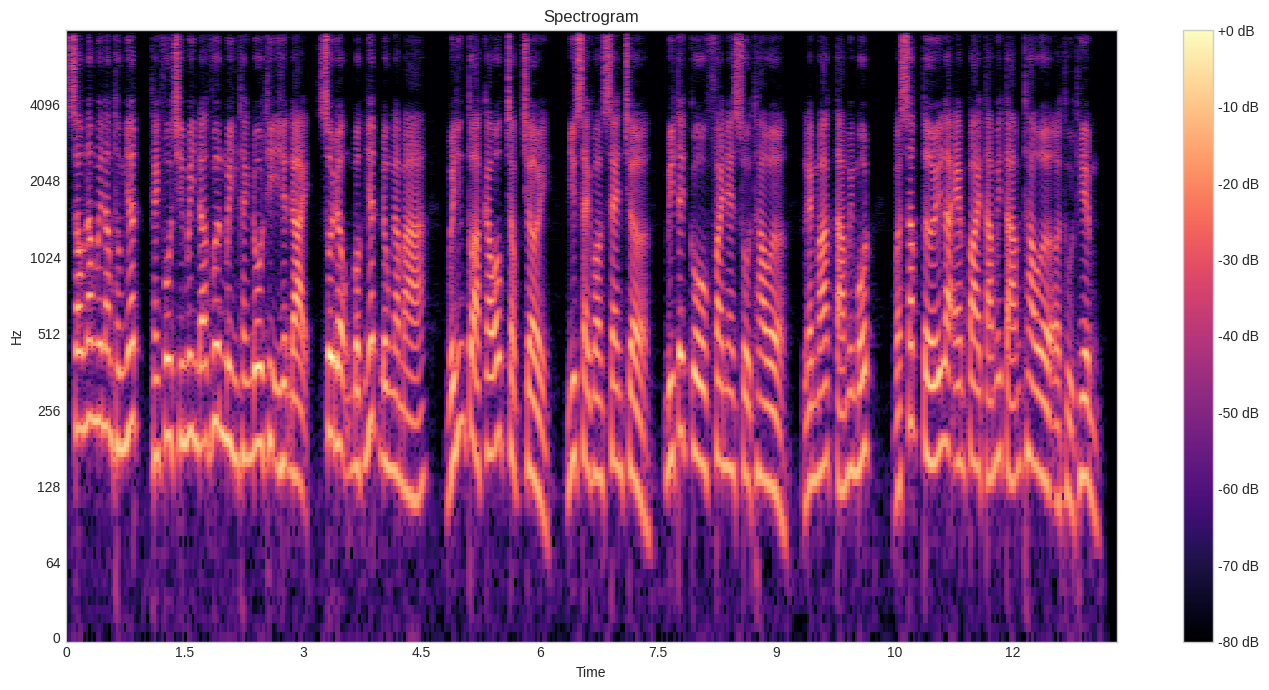

In [5]:
# Compute spectrogram
D = librosa.amplitude_to_db(np.abs(librosa.stft(audio_data, n_fft=2048, hop_length=512)), ref=np.max)

# Plot spectrogram
plt.figure(figsize=(14, 7))
librosa.display.specshow(D, sr=sample_rate, x_axis='time', y_axis='log', hop_length=512)
plt.colorbar(format='%+2.0f dB')
plt.title('Spectrogram')
plt.tight_layout()
plt.show()

## 4. Mel Spectrogram Visualization

Let's visualize the Mel spectrogram of the audio.

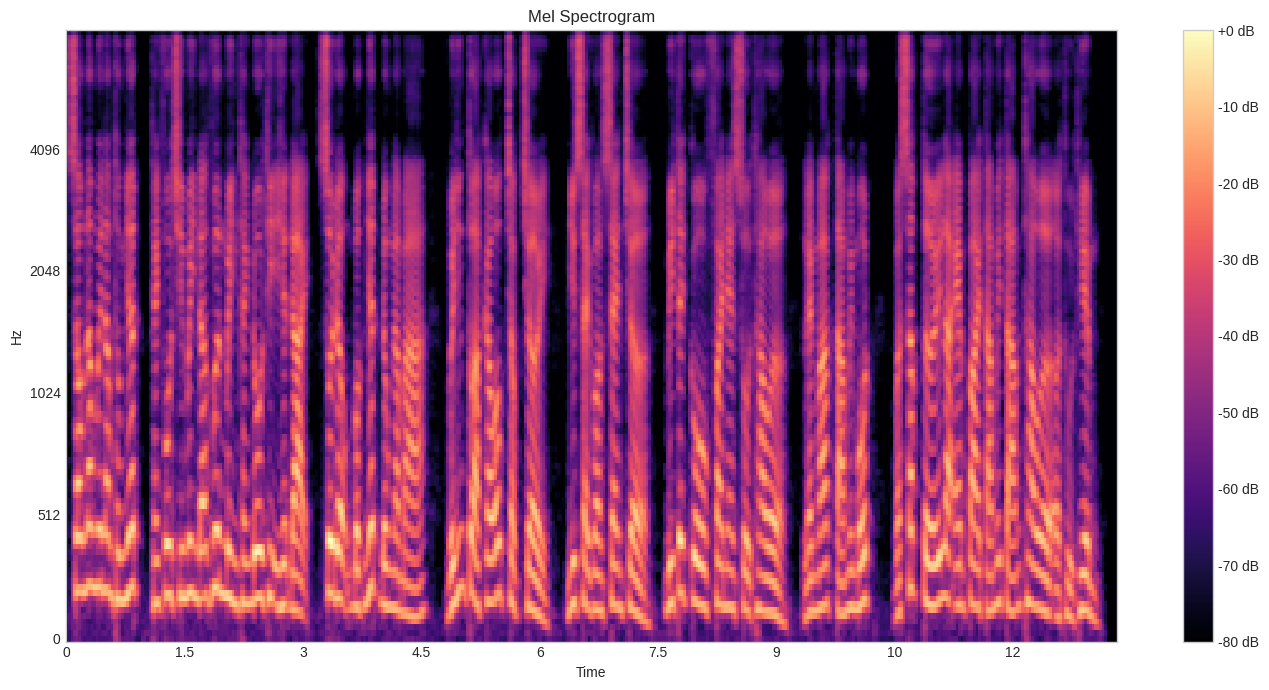

In [6]:
# Compute mel spectrogram
mel_spec = librosa.feature.melspectrogram(y=audio_data, sr=sample_rate, n_fft=2048, hop_length=512, n_mels=128)
mel_spec_db = librosa.power_to_db(mel_spec, ref=np.max)

# Plot mel spectrogram
plt.figure(figsize=(14, 7))
librosa.display.specshow(mel_spec_db, sr=sample_rate, x_axis='time', y_axis='mel', hop_length=512)
plt.colorbar(format='%+2.0f dB')
plt.title('Mel Spectrogram')
plt.tight_layout()
plt.show()

## 5. Chromagram Visualization

Let's visualize the chromagram of the audio.

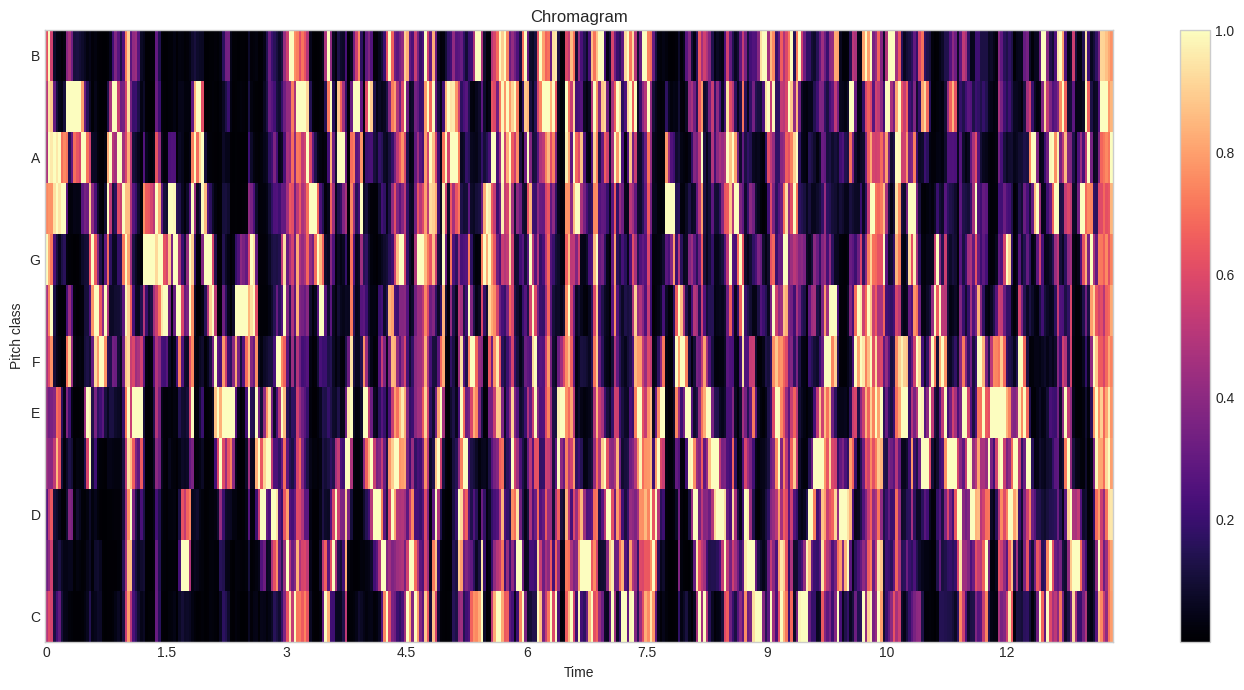

In [7]:
# Compute chromagram
chroma = librosa.feature.chroma_stft(y=audio_data, sr=sample_rate, n_fft=2048, hop_length=512)

# Plot chromagram
plt.figure(figsize=(14, 7))
librosa.display.specshow(chroma, sr=sample_rate, x_axis='time', y_axis='chroma', hop_length=512)
plt.colorbar()
plt.title('Chromagram')
plt.tight_layout()
plt.show()

## 6. 3D Spectrogram Visualization

Let's create a 3D visualization of the spectrogram.

/tmp/ipykernel_171555/3561762433.py:36: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax.set_yscale('log')


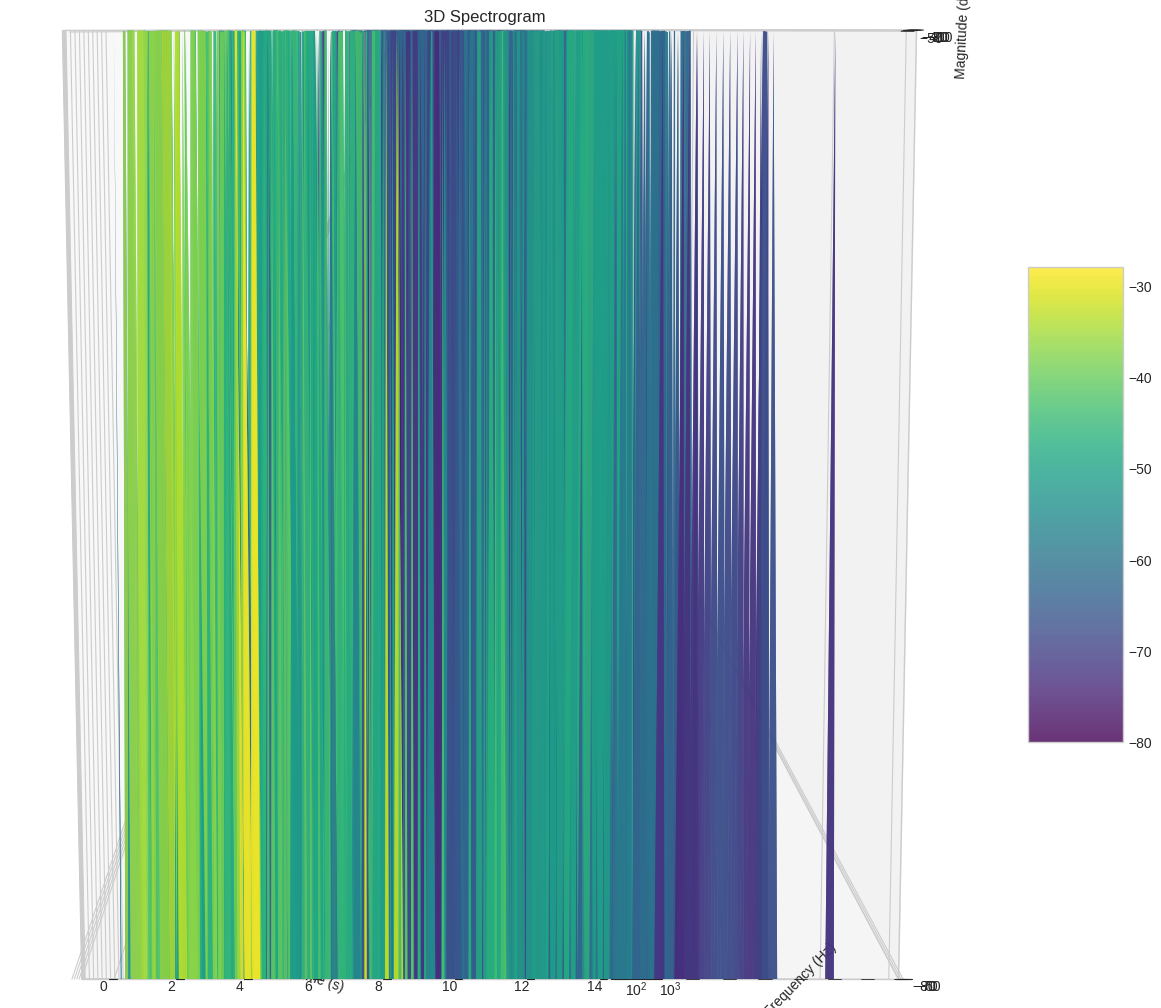

In [8]:
# Compute spectrogram
D = np.abs(librosa.stft(audio_data, n_fft=2048, hop_length=512))
D_db = librosa.amplitude_to_db(D, ref=np.max)

# Create meshgrid for 3D plot
times = librosa.times_like(D_db[0], sr=sample_rate, hop_length=512)
freqs = librosa.fft_frequencies(sr=sample_rate, n_fft=2048)

# Reduce dimensionality for better visualization
step_t = 4  # Time step
step_f = 4  # Frequency step
times_reduced = times[::step_t]
freqs_reduced = freqs[::step_f]
D_db_reduced = D_db[::step_f, ::step_t]

# Create meshgrid
T, F = np.meshgrid(times_reduced, freqs_reduced)

# Create 3D plot
fig = plt.figure(figsize=(14, 10))
ax = fig.add_subplot(111, projection='3d')

# Plot surface
surf = ax.plot_surface(T, F, D_db_reduced, cmap='viridis', alpha=0.8)

# Set labels and title
ax.set_xlabel('Time (s)')
ax.set_ylabel('Frequency (Hz)')
ax.set_zlabel('Magnitude (dB)')
ax.set_title('3D Spectrogram')

# Add colorbar
fig.colorbar(surf, ax=ax, shrink=0.5, aspect=5)

# Set frequency axis to log scale
ax.set_yscale('log')
ax.set_ylim(20, sample_rate/2)

plt.tight_layout()
plt.show()

## 7. Interactive Waveform Visualization with Plotly

Let's create an interactive waveform visualization using Plotly.

In [9]:
# Create time array
time = np.linspace(0, len(audio_data) / sample_rate, len(audio_data))

# Create interactive waveform plot
fig = go.Figure()

# Add waveform trace
fig.add_trace(go.Scatter(
    x=time,
    y=audio_data,
    mode='lines',
    name='Waveform',
    line=dict(color='blue', width=1)
))

# Add RMS energy trace
fig.add_trace(go.Scatter(
    x=rms_times,
    y=rms,
    mode='lines',
    name='RMS Energy',
    line=dict(color='red', width=2)
))

# Add mean line
fig.add_trace(go.Scatter(
    x=[0, time[-1]],
    y=[np.mean(audio_data), np.mean(audio_data)],
    mode='lines',
    name=f'Mean: {np.mean(audio_data):.4f}',
    line=dict(color='green', width=1, dash='dash')
))

# Add max line
fig.add_trace(go.Scatter(
    x=[0, time[-1]],
    y=[np.max(np.abs(audio_data)), np.max(np.abs(audio_data))],
    mode='lines',
    name=f'Max: {np.max(np.abs(audio_data)):.4f}',
    line=dict(color='orange', width=1, dash='dash')
))

# Update layout
fig.update_layout(
    title='Interactive Audio Waveform',
    xaxis_title='Time (s)',
    yaxis_title='Amplitude',
    hovermode='closest',
    width=900,
    height=500
)

# Add range slider
fig.update_layout(
    xaxis=dict(
        rangeslider=dict(visible=True),
        type='linear'
    )
)

fig.show()

## 8. Interactive Spectrogram Visualization with Plotly

Let's create an interactive spectrogram visualization using Plotly.

In [10]:
# Create interactive spectrogram plot
fig = go.Figure(data=go.Heatmap(
    z=D_db,
    x=times,
    y=freqs,
    colorscale='Viridis',
    zmin=-80,
    zmax=0
))

# Update layout
fig.update_layout(
    title='Interactive Spectrogram',
    xaxis_title='Time (s)',
    yaxis_title='Frequency (Hz)',
    yaxis_type='log',
    width=900,
    height=600
)

# Add range slider
fig.update_layout(
    xaxis=dict(
        rangeslider=dict(visible=True),
        type='linear'
    )
)

fig.show()

## 9. Multi-panel Visualization

Let's create a multi-panel visualization that combines different representations of the audio.

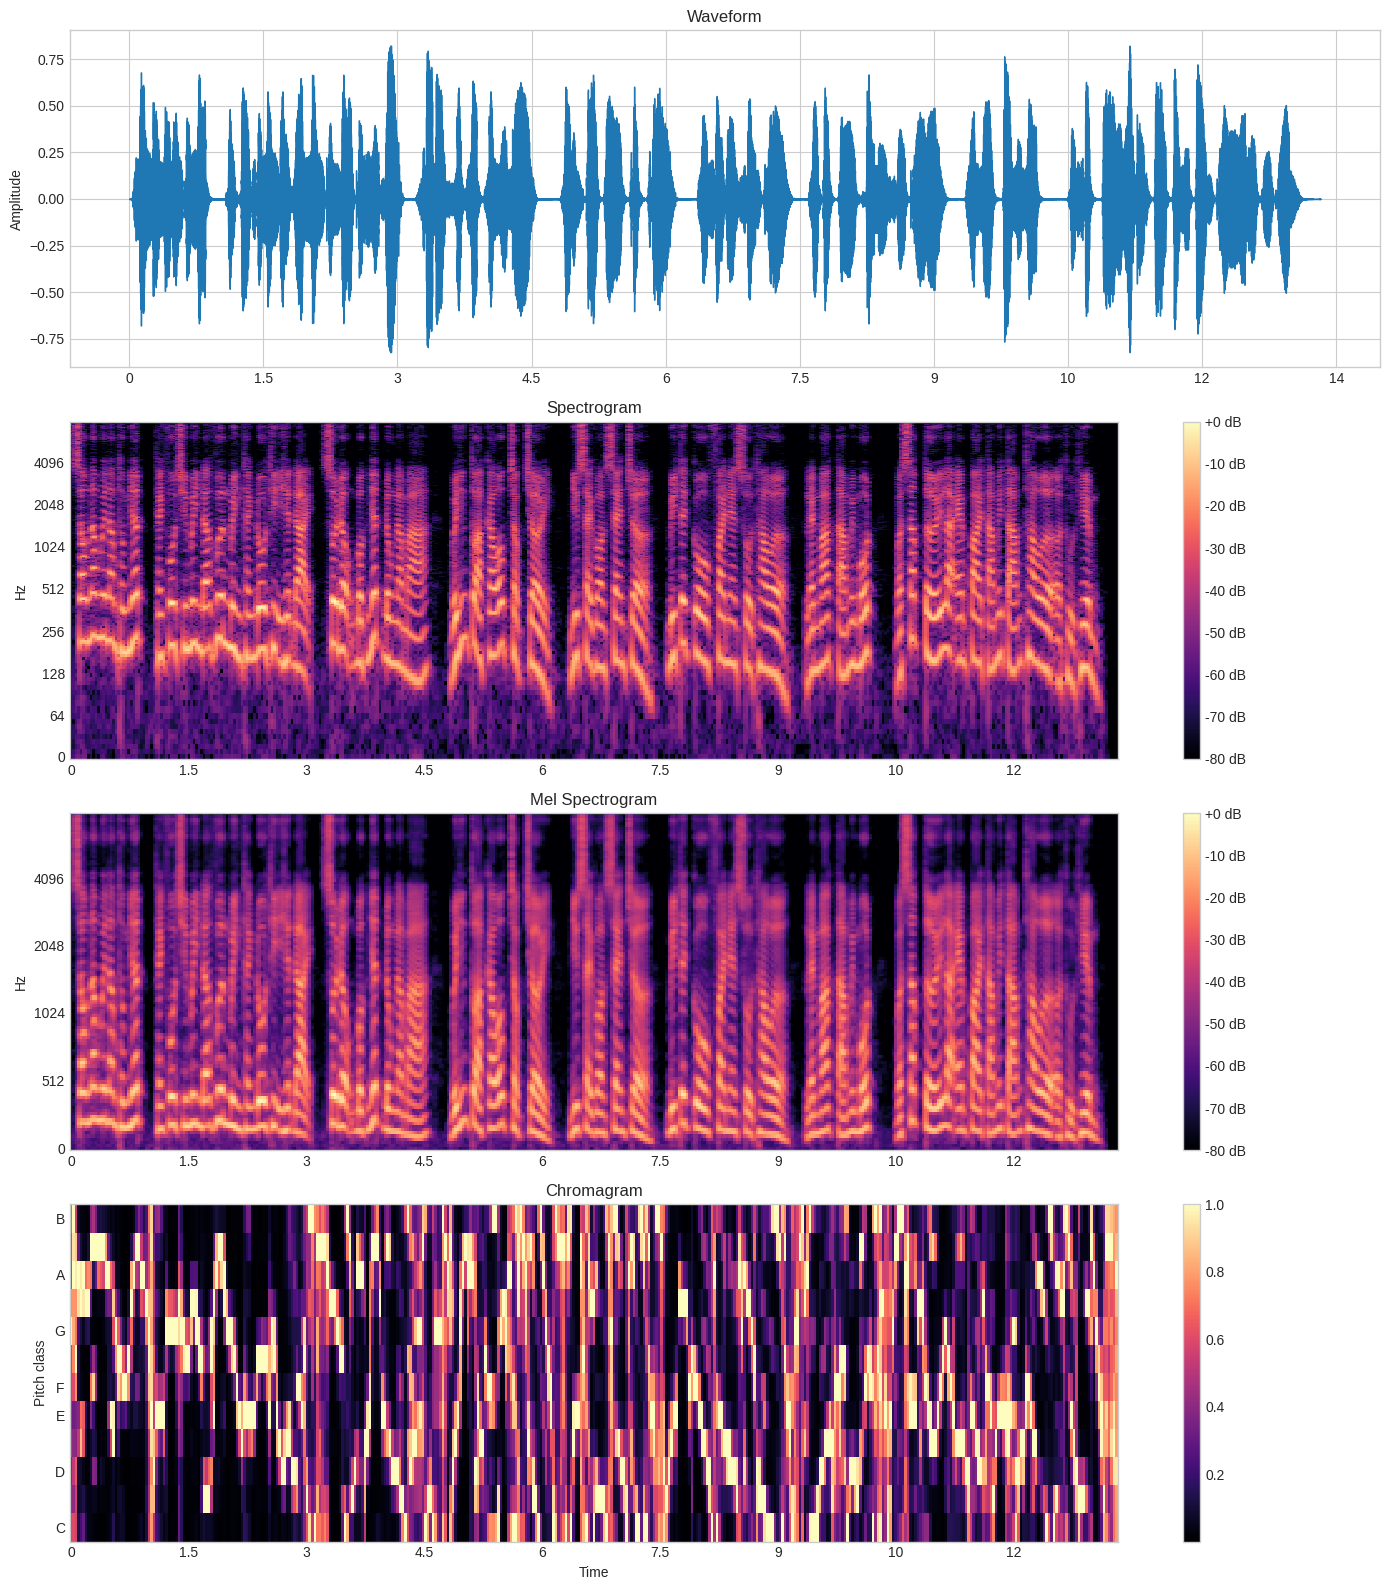

In [11]:
# Create multi-panel visualization
fig, axes = plt.subplots(4, 1, figsize=(14, 16))

# Plot waveform
librosa.display.waveshow(audio_data, sr=sample_rate, ax=axes[0])
axes[0].set_title('Waveform')
axes[0].set_xlabel('')
axes[0].set_ylabel('Amplitude')

# Plot spectrogram
librosa.display.specshow(D_db, sr=sample_rate, x_axis='time', y_axis='log', hop_length=512, ax=axes[1])
axes[1].set_title('Spectrogram')
axes[1].set_xlabel('')
fig.colorbar(axes[1].collections[0], ax=axes[1], format='%+2.0f dB')

# Plot mel spectrogram
librosa.display.specshow(mel_spec_db, sr=sample_rate, x_axis='time', y_axis='mel', hop_length=512, ax=axes[2])
axes[2].set_title('Mel Spectrogram')
axes[2].set_xlabel('')
fig.colorbar(axes[2].collections[0], ax=axes[2], format='%+2.0f dB')

# Plot chromagram
librosa.display.specshow(chroma, sr=sample_rate, x_axis='time', y_axis='chroma', hop_length=512, ax=axes[3])
axes[3].set_title('Chromagram')
fig.colorbar(axes[3].collections[0], ax=axes[3])

plt.tight_layout()
plt.show()

## Conclusion

In this notebook, we've explored various techniques for visualizing audio data using the CTC-SpeechRefinement package. We've demonstrated different ways to represent audio signals visually, including waveforms, spectrograms, mel spectrograms, chromagrams, 3D spectrograms, and interactive visualizations. These visualization techniques can help in understanding the characteristics and patterns of audio signals, which is important for audio analysis, feature extraction, and speech recognition tasks.